<a href="https://colab.research.google.com/github/lsescares/semillasDIGEVO/blob/master/semillas_DIGEVO_skyquest_68ec42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cargar la imagen grandes desde google drive

> Estas celdas acceden al google drive llamado 'semillas', que contiene todas las imagenes del proyecto.

>Lo que estamos haceindo es acceder a ese drive, descomprimir las imagenes, y luego las imagenes grandes, guardarlas en la carpeta 'imagenes_grandes', para que sean mas faciles de procesar.

>La siguiente celda te pedira acceso a tu google drive. Podras ejecutar las celdad de este colab si tienes acceso al google drive 'semillas'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd"/content/drive/My Drive/semillas/mapa_y_planilla_v_30_4_2020/imagenes_grandes"

/content/drive/.shortcut-targets-by-id/1tumJ-muam7Ts9yX9CA5GpYLdlc2GXMV2/semillas/mapa_y_planilla_v_30_4_2020/imagenes_grandes


# Cargar una imagen y escalarla
Esta funcion carga una imagen con imread y le aplica un resize para poder visualizarla en google colab. 
Si scale es igual a 1, se carga la imagen en sus dimensiones reales

In [0]:
import numpy as np
import cv2
import pandas as pd
import math
from google.colab.patches import cv2_imshow

def cargar_y_escalar(path, factor_escalamiento= 0.4):
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    (ancho_img,largo_img) = (int(img.shape[1]*factor_escalamiento), int(img.shape[0]*factor_escalamiento))
    img = cv2.resize(img, (ancho_img,largo_img), interpolation = cv2.INTER_AREA)
    return img
'''
path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'
img=cargar_y_escalar(path_img,0.1)
cv2_imshow(img)
'''

"\npath_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'\nimg=cargar_y_escalar(path_img,0.1)\ncv2_imshow(img)\n"

# Indice VARI

El indice vari indica la salud del cultivo. Se calcula usando:

BGR, canal blue es 0, canal green es 1, canal red es 2

VARI= (green-red)/(green+red-blue)

IMPORTANTE: el metodo VARI() retorna un numpry array de soló 1 canal.

In [0]:
import sys
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def VARI(img):
    return (img[:,:,1]-img[:,:,2]) / (img[:,:,1]+img[:,:,2]-img[:,:,0])

#ejemplo calculo Indice VARI:
'''
path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'
img = cargar_y_escalar(path_img,0.1)
img_VARI = VARI(img)
print(img_VARI)
'''
'''
def VARI_cond(img, img_boolean):          
    img_VARI_cond = np.zeros_like(img, np.uint8)

    for j in range(img.shape[1]):
        for i in range((img.shape[0])):
            if img_boolean[i,j] == True:#True significa que se debe consiferar el pixel para el promedio 
                img_VARI_cond
    
    return bgr_mean_cond
'''

"\npath_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'\nimg = cargar_y_escalar(path_img,0.1)\nimg_VARI = VARI(img)\nprint(img_VARI)\n"

# Umbral
Definición de la funcion: umbral_quitarSuelo(img)
* Nuevo enfoque de la funcion umbral, pasa la imagen a espacio HSV.
* Threshold para diferenciar plantas (B,G,R) de suelo (0,0,0), y escribir en tabla 2

ref:https://stackoverflow.com/questions/47483951/how-to-define-a-threshold-value-to-detect-only-green-colour-objects-in-an-image

(547, 364, 3)


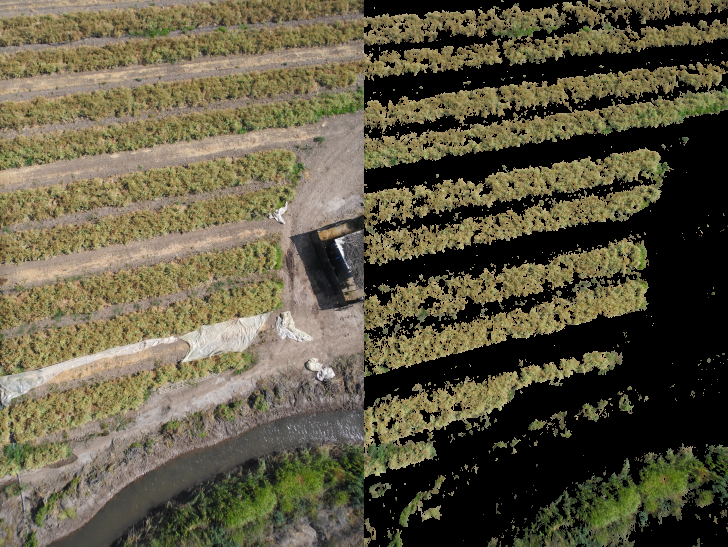

In [0]:
#### Cargar una de las imagenes grandes (mosaicos) y aplicarles la grilla con una inclinacion####
import numpy as np
import cv2
import pandas as pd
import math
from google.colab.patches import cv2_imshow

def umbral_quitarSuelo(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)## convertir to hsv

    ## mask of green (36,25,25) ~ (86, 255,255)
    #mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))

    #HSV <=>(Matiz, Saturación, Brillo), el umbral se tiene ir ajustando a mano maviendo el matiz.
    mask = cv2.inRange(hsv, (20, 50, 40), (85, 255,255))
    #mask tiene un 255 en los pixeles que quedaran en la imagen final(los verdes) y un 0 en los pixeles que no van a estar en la imagen final
    #mask = cv2.inRange(hsv, (0, 0, 25), (27, 255,255))
    #mask = np.expand_dims(mask,axis=2)
    #print (mask)
    #mask = cv2.resize(mask, img.shape[1::-1])
    #mask.reshape((547,364,3))
    #cv2_imshow(mask)
    ## slice the green
    mask_boolean = mask>0#imask es un numpy array de booleans, donde la imgen mask es 255, imask tiene un 'True'
    filtered = np.zeros_like(img, np.uint8)
    filtered[mask_boolean] = img[mask_boolean]
    return filtered

def umbral_quitarSuelo_boolean(img):#retorna un numpy array de booleanos
    #mask tiene un 255 en los pixeles que quedaran en la imagen final(los verdes) y un 0 en los pixeles que no van a estar en la imagen final
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)## convertir to hsv
    mask = cv2.inRange(hsv, (20, 50, 40), (85, 255,255))
    #cv2_imshow(mask)#<------ uncomment para ver imagen de los pixeles apagados
    mask_boolean = mask>0
    #print(mask_boolean)#<------ uncomment para printear array de los pixeles apagados
    return mask_boolean


path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'
img = cargar_y_escalar(path_img,0.1)
print(img.shape)
imagenes_concatenadas = np.concatenate((img,umbral_quitarSuelo(img)), axis = 1)
cv2_imshow(imagenes_concatenadas)
img_filtered_boolean = umbral_quitarSuelo_boolean(img)




# Promedio condicional 
Es decir, de soló los pixeles sobrevivientes al umbral.

Cuando se le aplica un umbral a una imagen, los pixeles que se deseaba eliminar quedan en negro y los que se deseaban conserbar quedan con el valor que tenian previo a aplicar el umbral.

Lo que se necesita implementar es una funcion que calcule el promedio de los valores de los pixeles que sobrevivieron al umbral. 
Por lo tanto necesitamos una manera de identificar que pixeles no sobrevivieron(se fueron a negro o se apagaron) y los que conservaron su valor. Esa manera es mediante el numpy array llamado img_boolean.

img_boolean es un numpy array de booleanos, de shape = 2, dos dimensiones, en resumen es una matriz. Es importante, especificar que esto significa que img_boolean NO indica individualemente en que canales el pixel se fue a cero, solamente indica si el canal se fue a cero o no. 

Entonces, para cada elemento de img_boolean: 

>TRUE   :  significa que el pixel(los tres canales) conservaron su valor original. 

>FALSE  :  significa que el pixel (los tres canales) se setearon a 0.




El metodo promedio_condicional_bolean(img, img_boolean) va recorriendo la imagen (img) por medio de un doble ciclo for; calculando el promedio de todos los pixeles que no son cero usando la info proveniente de img_boolean.

Anexo final, a primera impresion, esto se pudo haber calculado agregando algun filtro a la funcion cv2.mean(), asinedo que ignore los pixeles de valor 0. Sin embargo, para este proyecto en particular eso no estaria correcto. Porque que un pixel (o un grupo) de pixeles este en negro en la imagen inicial significa que las plantas de esa pequeña zona tienen un pesimo estado de salud y hacerlo de esa manera estaria ignorando esa información, es por esto que se implementa la funcion descrita anteriormente.

In [0]:
def mean_cond(img, img_boolean):          
    l_blue=[] #recordar que en openCV es todo BGR, asique mejor trabajar en ese formato
    l_green=[]
    l_red=[]
    for j in range(img.shape[1]):
        for i in range((img.shape[0])):
            if img_boolean[i,j] == True:#True significa que se debe consiferar el pixel para el promedio 
                l_blue.append(img[i,j,0])
                l_green.append(img[i,j,1])
                l_red.append(img[i,j,2])
    if len(l_blue) == 0:
        b_mean = 0
    else:
        b_mean = int(sum(l_blue)/len(l_blue))
    
    if len(l_green) == 0:
        g_mean = 0
    else:
        g_mean = int(sum(l_green)/len(l_green))
    
    if len(l_red) == 0:
        r_mean = 0
    else:
        r_mean = int(sum(l_red)/len(l_red))

    bgr_mean_cond = (b_mean, g_mean, r_mean)
    
    return bgr_mean_cond
'''
#Test promedio_condicional_bolean(img, img_boolean)

print(a.shape)
print(b.shape)
print('img.shape = ',img.shape)

img_boolean = umbral_quitarSuelo_boolean(img)
print('canal 0 = ')
print(img_crop[:,:,0])
print('canal 1 = ')
print(img_crop[:,:,1])
print('canal 2 = ')
print(img_crop[:,:,2])

cv2_imshow(img_crop)

#TEST lo escribo mañana

filtered = umbral_quitarSuelo(img_crop)
filtered_boolean = umbral_quitarSuelo_boolean(img_crop)
tuple_bgr_mean_cond = promedio_condicional_bolean(filtered,filtered_boolean)
print(tuple_bgr_mean_cond)

#cv2_imshow(np.concatenate((img,umbral_quitarSuelo(img)), axis = 1))
'''

"\n#Test promedio_condicional_bolean(img, img_boolean)\n\nprint(a.shape)\nprint(b.shape)\nprint('img.shape = ',img.shape)\n\nimg_boolean = umbral_quitarSuelo_boolean(img)\nprint('canal 0 = ')\nprint(img_crop[:,:,0])\nprint('canal 1 = ')\nprint(img_crop[:,:,1])\nprint('canal 2 = ')\nprint(img_crop[:,:,2])\n\ncv2_imshow(img_crop)\n\n#TEST lo escribo mañana\n\nfiltered = umbral_quitarSuelo(img_crop)\nfiltered_boolean = umbral_quitarSuelo_boolean(img_crop)\ntuple_bgr_mean_cond = promedio_condicional_bolean(filtered,filtered_boolean)\nprint(tuple_bgr_mean_cond)\n\n#cv2_imshow(np.concatenate((img,umbral_quitarSuelo(img)), axis = 1))\n"

In [0]:
def mean_cond_vari(img, img_boolean):          
    l=[] #recordar que en openCV es todo BGR, asique mejor trabajar en ese formato
    
    for j in range(img.shape[1]):
        for i in range((img.shape[0])):
            if img_boolean[i,j] == True:#True significa que se debe consiferar el pixel para el promedio 
                l.append(img[i,j])
    if len(l) == 0:
        mean_vari = 0
    elif sum(l)/len(l) == float('inf'): 
        #print('salio un infinito')
        mean_vari = 'inf'
    else:
        mean_vari = sum(l)/len(l)
    return mean_vari

def count_pixeles_apagados(img_boolean):
    return np.size(img_boolean)-np.sum(img_boolean)
'''
#Mini test count_pixeles_apagados()
img_boolean = np.array([[True,True,True],[True,True,True],[True,False,False]])
print('resultado esperado = 2, resultado obtenido = ',count_pixeles_apagados(img_boolean))
'''

resultado esperado = 2, resultado obtenido =  2


# Grilla 2.0
>Este nuevo enfoque, implementa la grilla como un objeto. Con metodos dibujar la grilla y crear puntos generadores.

>Este nuevo enfoque permite crear más de una grilla por imagen y permite definir más facilmente hasta que pixeles se crea la malla.

> Y de paso arreglar loss bugs de la version anterior :)

In [0]:
#### Cargar una de las imagenes grandes (mosaicos) y aplicarles la grilla con una inclinacion####
import numpy as np
import cv2
import pandas as pd
import math
from google.colab.patches import cv2_imshow

amarillo = (0,255,255)
cian = (255,255,0)
magenta = (255,0,255)
rojo = (0,0,255)
verde =(0,255,0)
azul = (255,0,0)

color_lineas = verde

class RRect:
  def __init__(self, p0, s, ang):
    self.p0 = (int(p0[0]),int(p0[1]))
    (self.W, self.H) = s
    self.ang = ang
    self.p1,self.p2,self.p3 = self.get_verts(p0,s[0],s[1],ang)
    self.verts = [self.p0,self.p1,self.p2,self.p3]

  def get_verts(self, p0, W, H, ang):
    sin = np.sin(ang/180*3.14159)
    cos = np.cos(ang/180*3.14159)
    P1 = (int(self.H*sin)+p0[0],int(self.H*cos)+p0[1])
    P2 = (int(self.W*cos)+P1[0],int(-self.W*sin)+P1[1])
    P3 = (int(self.W*cos)+p0[0],int(-self.W*sin)+p0[1])
    return [P1,P2,P3]

  def drawRect(self, img):
    for i in range(len(self.verts)-1):
        cv2.line(img, (self.verts[i][0], self.verts[i][1]), (self.verts[i+1][0],self.verts[i+1][1]), color = color_lineas, thickness = 1)
        cv2.line(img, (self.verts[3][0], self.verts[3][1]), (self.verts[0][0], self.verts[0][1]), color = color_lineas, thickness = 1)

class grilla:
    def __init__(self,pxstep , inclinacion):
        self.pxstep = pxstep
        self.inclinacion = inclinacion

    def crear_ptos_generadores(self,img):
        ptos_generadores=[]
        l_aux=[]
        P0 = (self.pxstep, self.pxstep)
        ptos_generadores.append(P0)
        (W, H) = (self.pxstep, self.pxstep)
        rr = RRect(P0, (W,H), self.inclinacion)
        for j in range(0,img.shape[0]-self.pxstep*2,self.pxstep):
            l_aux.append(rr.verts[1])    
            for i in range(0,img.shape[1]-self.pxstep*3,self.pxstep):##<<<<----en esta definicion arbitraria de *3 esta el error de la casilla 72
                rr = RRect(P0,(W,H),self.inclinacion)
                ptos_generadores.append(rr.verts[3])
                P0 = rr.verts[3]  
            P0 = l_aux.pop()
            ptos_generadores.append(P0)
            rr = RRect(P0,(W,H),self.inclinacion)
        ptos_generadores.pop()
        return ptos_generadores


    def dibujar_grilla_numerada(self, img):
        (W, H) = (self.pxstep, self.pxstep)
        ptos_generadores = self.crear_ptos_generadores(img)#llama automaticamente al metodo crear_ptos_generadores
        #----parametros de la linea--------
        font = cv2.FONT_HERSHEY_SIMPLEX 
        fontScale = 0.5
        thickness = 1# 1 pixel
        #-----------------------------------
        cel_number = 1
        for P0 in ptos_generadores:
            pos_cel_number = (int(P0[0]) , int(P0[1]+self.pxstep/1.5))
            rr = RRect(P0,(W,H),self.inclinacion)#crea el objeto rectangulo, lo que incluye el calculo de sus vertices  
            rr.drawRect(img)
            cv2.putText(img, str(cel_number), pos_cel_number, font, fontScale, color_lineas, thickness, cv2.LINE_AA) 
            cel_number+=1
        return img    

path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'
img = cargar_y_escalar(path_img,0.2)
grilla1 = grilla(pxstep =40, inclinacion=3)
img_con_grilla = grilla1.dibujar_grilla_numerada(img) 
cv2_imshow(img_con_grilla)


In [0]:
#aplicar sucesibamente las funciones
path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'

img = cargar_y_escalar(path_img  ,0.1)
img_fil = umbral_quitarSuelo(img)
ptos_generadores = generar_ptos_grilla(img)
#cv2.imwrite('grilla'+'url',dibujar_grilla_numerada(img))#cv2.imwrite no funciona el colab
#distancias_btw_celdas = tabla_distancias(ptos_generadores)
#distancias_btw_celdas.to_excel('distancias_btw_celdas.xlsx')
dataset = make_dataset(img, ptos_generadores)
dataset.to_excel('dataset.xlsx')

img_con_grilla = dibujar_grilla_numerada(img_fil, pxstep = 40, inclinacion = 1) 
cv2_imshow(img_con_grilla)


# Grilla numerada

* Definicion de las funciones:
        generar_ptos_grilla(img, pxstep = 40, inclinacion = 1):
        dibujar_grilla_numerada(img, pxstep = 40, inclinacion = 1):
* Y Del objeto: 'RRect', que pasandole un punto(una tupla), un pxstep y un angulo, crea los 4 puntos necesarios para dibujar la celda de la grilla


In [0]:
#### Cargar una de las imagenes grandes (mosaicos) y aplicarles la grilla con una inclinacion####
import numpy as np
import cv2
import pandas as pd
import math
from google.colab.patches import cv2_imshow

amarillo = (0,255,255) 
cian = (255,255,0)
magenta = (255,0,255)
rojo = (0,0,255)
verde =(0,255,0)
azul = (255,0,0)

color_lineas = verde

class RRect:
  def __init__(self, p0, s, ang):
    self.p0 = (int(p0[0]),int(p0[1]))
    (self.W, self.H) = s
    self.ang = ang
    self.p1,self.p2,self.p3 = self.get_verts(p0,s[0],s[1],ang)
    self.verts = [self.p0,self.p1,self.p2,self.p3]

  def get_verts(self, p0, W, H, ang):
    sin = np.sin(ang/180*3.14159)
    cos = np.cos(ang/180*3.14159)
    P1 = (int(self.H*sin)+p0[0],int(self.H*cos)+p0[1])
    P2 = (int(self.W*cos)+P1[0],int(-self.W*sin)+P1[1])
    P3 = (int(self.W*cos)+p0[0],int(-self.W*sin)+p0[1])
    return [P1,P2,P3]

  def drawRect(self, image):
    for i in range(len(self.verts)-1):
        cv2.line(image, (self.verts[i][0], self.verts[i][1]), (self.verts[i+1][0],self.verts[i+1][1]), color = color_lineas, thickness = 1)
        cv2.line(image, (self.verts[3][0], self.verts[3][1]), (self.verts[0][0], self.verts[0][1]), color = color_lineas, thickness = 1)


def generar_ptos_grilla(img, pxstep = 20, inclinacion=1):
    ptos_generadores=[]
    l_aux=[]
    P0=(pxstep,pxstep)
    ptos_generadores.append(P0)
    (W, H) = (pxstep,pxstep)
    rr = RRect(P0,(W,H),inclinacion)
    for j in range(0,img.shape[0]-pxstep*2,pxstep):
        l_aux.append(rr.verts[1])    
        for i in range(0,img.shape[1]-pxstep*3,pxstep):
            rr = RRect(P0,(W,H),inclinacion)
            ptos_generadores.append(rr.verts[3])
            P0 = rr.verts[3]  
        P0 = l_aux.pop()
        ptos_generadores.append(P0)
        rr = RRect(P0,(W,H),inclinacion)
    ptos_generadores.pop()
    return ptos_generadores


def dibujar_grilla_numerada(img, pxstep = 40, inclinacion = 1):
    #pxstep = 40
    #inclinacion = 1 #degrees
    (W, H) = (pxstep,pxstep)
    ptos_generadores = generar_ptos_grilla(img,pxstep = pxstep,inclinacion = inclinacion)
    #----parametros de la linea--------
    font = cv2.FONT_HERSHEY_SIMPLEX 
    fontScale = 0.5
    thickness = 1# 1 pixel
    #-----------------------------------
    cel_number = 1
    for P0 in ptos_generadores:
        org_cel_num = (int(P0[0]) , int(P0[1]+pxstep/1.5))
        rr = RRect(P0,(W,H),inclinacion)#crea el objeto rectangulo, lo que incluye el calculo de sus vertices  
        rr.drawRect(img)
        cv2.putText(img, str(cel_number), org_cel_num, font, fontScale, color_lineas, thickness, cv2.LINE_AA) 
        cel_number+=1
    return img    
'''
path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'
img = cargar_y_escalar(path_img,0.2)
img_con_grilla = dibujar_grilla_numerada(img, pxstep = 40, inclinacion = 1) 
cv2_imshow(img_con_grilla)
'''

"\npath_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'\nimg = cargar_y_escalar(path_img,0.2)\nimg_con_grilla = dibujar_grilla_numerada(img, pxstep = 40, inclinacion = 1) \ncv2_imshow(img_con_grilla)\n"

# Tabla de distancias entre celdas

Tabla donde las columnas y las filas son los id de la cuadricula, los elemEntos de la tabla son las distancias en metros.

In [0]:
import pandas as pd
import numpy as np

def tabla_distancias(ptos_generadores, pxstep = 40, inclinacion = 1):
    nombres_filas = np.arange(1, len(ptos_generadores)+1,1, np.int16)
    nombres_columnas=nombres_filas
    #distancias es un numpy array de shaper =(len(ptos_gen)+1,len(ptos_gen)+1)
    distancias = np.zeros((len(ptos_generadores), len(ptos_generadores)))

    largo_un_pixel = 1 # ese valor se saca de la seccion: 'Calcular distancia en metros entre centro de celdas'
                        #va a depender de cada imagen y de sus coordenadas kml

    i=1
    j=1
    for p in ptos_generadores:
        #print('===============================')
        #print('p = ',p)
        centro_celda_p = (int(p[0]+pxstep/2) , int(p[1]+pxstep/2))
        #print('centro_celda_p =',centro_celda_p)
        for k in ptos_generadores:
            #print('...............................')
            #print('i=',i,'j=',j)
            #print('k=',k)
            centro_celda_k = (int(k[0]+pxstep/2) , int(k[1]+pxstep/2))
            #print('centro_celda_k =',centro_celda_k)
            dx = abs(centro_celda_k[0] - centro_celda_p[0])
            dy = abs(centro_celda_k[1] - centro_celda_p[1])
            d = int(math.sqrt(math.pow(dx,2) + math.pow(dy,2)))*largo_un_pixel
            #print('d=',d)
            distancias[i-1][j-1] = d
            
            #print('distancias[',i,'][',j,']=',distancias[i-1][j-1])
            j+=1
        j=1      
        i+=1    
    distancias_btw_celdas = pd.DataFrame(distancias, index = nombres_filas, columns = nombres_columnas)
    return distancias_btw_celdas

path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'
img=cargar_y_escalar(path_img,0.2)

ptos_generadores = generar_ptos_grilla(img)
distancias_btw_celdas = tabla_distancias(ptos_generadores)

distancias_btw_celdas.to_excel('distancias_btw_celdas.xlsx')

print(distancias_btw_celdas)

        1       2       3       4    ...     439     440     441     442
1       0.0    39.0    78.0   117.0  ...  1098.0  1117.0  1137.0  1157.0
2      39.0     0.0    39.0    78.0  ...  1081.0  1098.0  1117.0  1137.0
3      78.0    39.0     0.0    39.0  ...  1065.0  1081.0  1098.0  1117.0
4     117.0    78.0    39.0     0.0  ...  1050.0  1065.0  1081.0  1098.0
5     156.0   117.0    78.0    39.0  ...  1036.0  1050.0  1065.0  1081.0
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
438  1081.0  1065.0  1050.0  1036.0  ...    39.0    78.0   117.0   156.0
439  1098.0  1081.0  1065.0  1050.0  ...     0.0    39.0    78.0   117.0
440  1117.0  1098.0  1081.0  1065.0  ...    39.0     0.0    39.0    78.0
441  1137.0  1117.0  1098.0  1081.0  ...    78.0    39.0     0.0    39.0
442  1157.0  1137.0  1117.0  1098.0  ...   117.0    78.0    39.0     0.0

[442 rows x 442 columns]


# Tabla de valor medio RGB de la celda

Tablar con id de la cuadricula y el valor medio BGR de la cuadricula.

In [0]:
import pandas as pd
import numpy as np
import cv2

def tabla_meanRGB(img, ptos_generadores, pxstep = 40, inclinacion = 1):
    nombres_filas = np.arange(1, len(ptos_generadores)+1,1, np.int16)
    #data_mean_BGR = np.zeros((len(ptos_gen)))
    data_mean_BGR = []
    pxstep = ptos_generadores[1][0]-ptos_generadores[0][0]
    (W,H) =(pxstep,pxstep)
    
    
    m=1
    for p in ptos_generadores:
        info_celda=[]
        rr = RRect(p,(W,H),inclinacion)
        p0 = p
        p2 = rr.verts[2]
        #mean_B = cv2.mean(img[p0[0]:p2[0]][p0[1]:p2[1]][0])
        #mean_G = cv2.mean(img[p0[0]:p2[0]][p0[1]:p2[1]][1])
        #mean_R = cv2.mean(img[p0[0]:p2[0]][p0[1]:p2[1]][2])
        
        mean = cv2.mean(img[ p0[0]:p2[0] , p0[1]:p2[1] ])
        #print(mean)
        mean_BGR =int (np.mean([mean[0], mean[1],mean[2]]))
        #data_mean_BGR[m-1]=mean_BGR
        info_celda.append(mean_BGR)
        info_celda.append(int(mean[2]))
        info_celda.append(int(mean[1]))
        info_celda.append(int(mean[0]))
        data_mean_BGR.append(info_celda)
        m+=1
    #FALTA LIMAR VALORES FINALES
    meanRGB_celdas = pd.DataFrame(data_mean_BGR, index = nombres_filas, columns = ['meanRGB','meanR','meanG','meanB'])
    return  meanRGB_celdas

ptos_generadores = generar_ptos_grilla(img)
meanRGB_celdas = tabla_meanRGB(img,ptos_generadores)
meanRGB_celdas.to_excel('meanRGB_celdas.xlsx')
print(meanRGB_celdas)


    meanRGB  meanR  meanG  meanB
1       119    139    124     93
2       136    158    142    109
3       126    147    134     98
4       141    161    145    119
5       122    144    128     95
..      ...    ...    ...    ...
92        0      0      0      0
93        0      0      0      0
94        0      0      0      0
95        0      0      0      0
96        0      0      0      0

[96 rows x 4 columns]


# Crear dataset <=> crear excel final
Esta funcion es una version extendida de tabla de valor medio RGB. Esta funcion retorna un pandas con toda la info requerida

In [0]:
import pandas as pd
import numpy as np
import cv2

def make_dataset(img, ptos_generadores, pxstep = 40, inclinacion = 1):
    nombres_filas = np.arange(1, len(ptos_generadores)+1,1, np.int16)
    #data_mean_BGR = np.zeros((len(ptos_gen)))
    dataset = []
    pxstep = ptos_generadores[1][0]-ptos_generadores[0][0]
    (W,H) =(pxstep,pxstep)
    
    img_fil = umbral_quitarSuelo(img)
    img_fil_bool = umbral_quitarSuelo_boolean(img)
    img_VARI = VARI(img)
    img_VARI_fil = VARI(img_fil)
    #cv2_imshow(img_VARI_fil)
    #tuple_bgr_mean_cond = mean_cond(filtered,filtered_boolean)

    for p in ptos_generadores:
        info_celda=[]
        rr = RRect(p,(W,H),inclinacion)
        p0 = p
        p2 = rr.verts[2]
        #mean_B = cv2.mean(img[p0[0]:p2[0]][p0[1]:p2[1]][0])
        #mean_G = cv2.mean(img[p0[0]:p2[0]][p0[1]:p2[1]][1])
        #mean_R = cv2.mean(img[p0[0]:p2[0]][p0[1]:p2[1]][2])
        
        mean = cv2.mean(img[ p0[0]:p2[0] , p0[1]:p2[1] ])
        #print(mean)
        mean_BGR =int (np.mean([mean[0], mean[1],mean[2]]))
        #data_mean_BGR[m-1]=mean_BGR
        info_celda.append(mean_BGR)
        info_celda.append(int(mean[2]))
        info_celda.append(int(mean[1]))
        info_celda.append(int(mean[0]))
        
        ### Arega el promedio del indice VARI ###

        mean_VARI_celda = np.mean(img_VARI[ p0[0]:p2[0] , p0[1]:p2[1] ] ,axis = None) #axis = None, significa que calcula el promedio de todo el array de 2D
        #print('mean_VARI_celda = ',mean_VARI_celda)
        info_celda.append(mean_VARI_celda)
        
        ### Agregan los promedios BGR corregidos ###
    
        mean_corregido = mean_cond(img_fil[p0[0]:p2[0],p0[1]:p2[1]] , img_fil_bool[ p0[0]:p2[0] , p0[1]:p2[1] ])
        mean_BGR_corregido =int (np.mean([mean_corregido[0], mean_corregido[1], mean_corregido[2]]))
        
        info_celda.append(mean_BGR_corregido)
        info_celda.append(int(mean_corregido[2]))#esto es para la el excel quede en orden rgb
        info_celda.append(int(mean_corregido[1]))#revizar explicitamente el orden
        info_celda.append(int(mean_corregido[0]))
        
        ### Agregar el VARI corregido ###
        mean_VARI_celda_corregido = mean_cond_vari(img_VARI_fil[ p0[0]:p2[0] , p0[1]:p2[1] ], img_fil_bool[ p0[0]:p2[0] , p0[1]:p2[1] ] )#axis = None, significa que calcula el promedio de todo el array de 2D
        #print(mean_VARI_celda_corregido)
        info_celda.append(mean_VARI_celda_corregido)
        
        ### Agregar la cantidad de pixeles que se apagaron al aplicar el umbral ###
        pxl_apagados = count_pixeles_apagados(img_fil_bool[ p0[0]:p2[0] , p0[1]:p2[1] ]) 
        info_celda.append(pxl_apagados)
        
        ### Agregar la coordenada CENTRO de la celda (x,y) ###
        x_centro_celda = int(p[0]+pxstep/2)
        y_centro_celda = int(p[1]+pxstep/2)
        info_celda.append(x_centro_celda)
        info_celda.append(y_centro_celda)

        ### Agregar la lista (fila de datos) al dataset final ###
        dataset.append(info_celda)
    dataset = pd.DataFrame(dataset, index = nombres_filas, columns = ['meanRGB','meanR','meanG','meanB','VARI','meanRGB_corregido','meanR_corregido','meanG_corregido','meanB_corregido','VARI_corregido','n_pxl_apagados','x_centro_celda','y_centro_celda'])
    return  dataset

path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'
img=cargar_y_escalar(path_img,0.1)

ptos_generadores = generar_ptos_grilla(img)
dataset = make_dataset(img,ptos_generadores)
dataset.to_excel('dataset_img_semillas.xlsx')
print(dataset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


     meanRGB  meanR  meanG  ...  n_pxl_apagados  x_centro_celda  y_centro_celda
1        111    132    118  ...              33              29              29
2        122    140    126  ...             177              48              29
3        114    136    122  ...              61              67              29
4        154    173    154  ...             320              86              29
5        124    147    131  ...             144             105              29
..       ...    ...    ...  ...             ...             ...             ...
438        0      0      0  ...               0             257             504
439        0      0      0  ...               0             276             504
440        0      0      0  ...               0             295             504
441        0      0      0  ...               0             314             504
442        0      0      0  ...               0             333             504

[442 rows x 13 columns]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#Exploracion archivo .kml y Calcular distancia en metros entre centro de celdas
-Se realiza usando las coordenas geograficas del archivo de extencion .kml
- Los archivos .kml y .tfw son extenciones de archivos relacionados a coordenadas geograficas

In [0]:
import numpy as np
import cv2
import pandas as pd
import math
from google.colab.patches import cv2_imshow

img_grande = cv2.imread('/content/semillasDIGEVO/MapPlan_Orthomosaic_export_ThuJan16135927.958381.jpg',cv2.IMREAD_COLOR)
img = img_grande[60:190, 20:235]

pxstep = 5#<-- buen ancho de la grilla
#distanciaEntreCuadrantes, calcula la distancia en METROS entre los centros de dos celdas
def distanciaEntreCeldas(x_celda1, y_celda1, x_celda2, y_celda2):
    dx = pxstep*abs(x_celda2 - x_celda1)
    dy = pxstep*abs(y_celda2 - y_celda1)
    return int(math.sqrt(math.pow(dx,2) + math.pow(dy,2)))*largo_un_pixel
#print('distancia entre centro de celdas = ', distanciaEntreCeldas(0,0,0,1), 'pixeles')

#pasar de pixeles a metros usando coordenadas geograficas del archivo.kml

#latitud solo puede ser Norte o Sur
#longitud solo puede ser Este(E) o Oeste(W)

#las coordenadas son tuplas de la forma (latitud, longitud)
#El archivo trae las coordenadas
'''
          <north> -33.71291666666667 </north>
          <south> -33.714061111111114 </south>
          <east> -71.25732222222223 </east>
          <west> -71.25869722222222 </west>
'''

#opcion 1 (north,east) ; (south,west)
#coords_1 = (-33.71291666666667, -71.25732222222223)
#coords_2 = (-33.714061111111114, -71.25869722222222)

#opcion2 (north,west) ; (south,east)
#ambas combinaciones dan la misma distancia
#coords_1_op2 = (-33.71291666666667, -71.25869722222222)
#coords_2_op2 = (-33.714061111111114, -71.25732222222223)
import geopy.distance
#print('distancia entre centro de celdas = ', geopy.distance.vincenty(coords_1, coords_2).m, 'metros')

#Hipotesis, con esas coordenadas se define un cuadrado, ese cuadrado es el mismo que corresponde a la imagen.
#Luego, conociendo la medida del lado de ese cuadrado, haciendo una regla de 3 (de proporcionalidad), 
#se conoce a cuantos metros equivale un pixel.

#La medida del lado del cuadrado se calcula midiendo la distancia entre las
#coordenadas (north,east) y (north, west) 
coords_1_lado = (-33.71291666666667, -71.25732222222223)
coords_2_lado = (-33.71291666666667, -71.25869722222222)
d_lado = geopy.distance.vincenty(coords_1_lado, coords_2_lado).m
print('distancia entre centro de celdas = ', d_lado, 'metros')
print('la imagen es un cuadrado de ',img_grande.shape[1],'pixeles')
largo_un_pixel = d_lado/img_grande.shape[1]
print('1 pixel mide',largo_un_pixel,'metros')
print('Finalmente, por ejemplo:')
print('distancia entre centros de celdas (0,0)(0,1)= ', distanciaEntreCeldas(0,0,0,1),'metros') 

distancia entre centro de celdas =  127.45481579464024 metros
la imagen es un cuadrado de  306 pixeles
1 pixel mide 0.41651900586483737 metros
Finalmente, por ejemplo:
distancia entre centros de celdas (0,0)(0,1)=  2.082595029324187 metros


In [0]:
import numpy as np
import cv2
import pandas as pd
import math
from google.colab.patches import cv2_imshow

pxstep = 5#<-- buen ancho de la grilla
#distanciaEntreCuadrantes, calcula la distancia en METROS entre los centros de dos celdas
def distanciaEntreCeldas(x_celda1, y_celda1, x_celda2, y_celda2):
    dx = pxstep*abs(x_celda2 - x_celda1)
    dy = pxstep*abs(y_celda2 - y_celda1)
    return int(math.sqrt(math.pow(dx,2) + math.pow(dy,2)))*largo_un_pixel

import geopy.distance

coords_1_lado = (-35.24231562815119,-71.24625827781861)#-->arriba, izq

coords_2_lado = (-35.24370430392184,-71.24699187890207)#-->abajo,izq


d_lado = geopy.distance.vincenty(coords_1_lado, coords_2_lado).m
print('distancia entre centro de celdas = ', d_lado, 'metros')
#print('la imagen es un cuadrado de ',img_grande.shape[1],'pixeles')

distancia entre centro de celdas =  167.91319606470188 metros


# Procesar todas los mapas del drive

1.   Para esto, se crean funciones con los codigos que se escribieron en las celdas anteriores.
2.   Se debe hacer todo online, asi que, destro del colab se accede al google drive del proyecto llamado 'semillas' y se descomprimen las carpetas
3. Se accede a las carpetas buscando archivos .jpg y su .kml correspondiente
4. Se hace un loop que procese la imagen usando las funciones creadas en las celdas anteriores
5. En el drive, se crea una carpeta con las imagenes .jpg, su .kml y los 2 archivo .xlsx creados

Realmente la complicacion es manejar un google drive compartido evitando descargar todas las imagenes y subirlas denuevo, porque el drive pesa 12GB asi que seria largisimo resubirlo





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


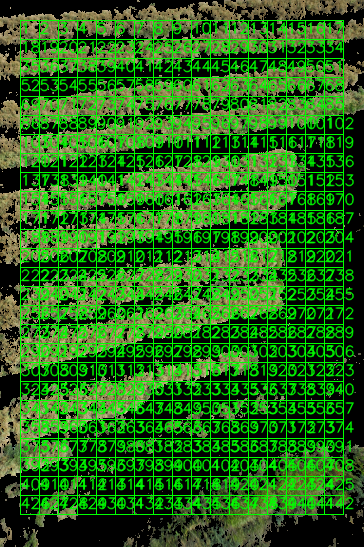

In [0]:
#aplicar sucesibamente las funciones
path_img = '/content/semillasDIGEVO/EP-01-22002_0145_0163.png'

img = cargar_y_escalar(path_img  ,0.1)
img_fil = umbral_quitarSuelo(img)
ptos_generadores = generar_ptos_grilla(img)
#cv2.imwrite('grilla'+'url',dibujar_grilla_numerada(img))#cv2.imwrite no funciona el colab
#distancias_btw_celdas = tabla_distancias(ptos_generadores)
#distancias_btw_celdas.to_excel('distancias_btw_celdas.xlsx')
dataset = make_dataset(img, ptos_generadores)
dataset.to_excel('dataset.xlsx')

img_con_grilla = dibujar_grilla_numerada(img_fil, pxstep = 40, inclinacion = 1) 
cv2_imshow(img_con_grilla)


#----->arreglar lo de definir unicamente 1 pxstep y lo de que no me toma desde la celda 73(pxstep 40) en adelante
# o la 324 (pxstep 20)